<a href="https://colab.research.google.com/github/ipeirotis/dealing_with_data/blob/master/06-Spatial_Data_and_Maps/B-Showing_Census_Variables_on_a_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq libproj-dev proj-data proj-bin libgdal-dev libspatialindex-dev  libgeos-dev

!pip uninstall -y  shapely
!pip install shapely --no-binary shapely

!pip install -U pyshp six cartopy geopandas fiona pyproj descartes pysal rtree pykdtree pyepsg pillow OWSLib geoplot folium

!pip3 install -U CensusData 

In [ ]:
!pip3 install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import censusdata
import matplotlib.pyplot as plt

gpd.options.use_pygeos = True

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.6.2-CAPI-1.10.2 4d2925d6) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Setup

In [ ]:
STATEFP = "36"  # New York State
COUNTYFP = "061"  # Manhattan
YEAR = 2019

## Download Tract Shapefile for State and Limit Tracts to County of Interest

In [ ]:
# Download the census tracts shapes from US Census
# We download from the TIGER shapefiles repository


# Download the boundaries of tracts
filename = f"tl_{YEAR}_{STATEFP}_tract.zip"
!mkdir -p maps
!curl  -s https://www2.census.gov/geo/tiger/TIGER$YEAR/TRACT/$filename -o maps/$filename
!cd maps && unzip -o $filename
shapefile = f"maps/{filename[:-4]}.shp"
geo_df = gpd.GeoDataFrame.from_file(shapefile)
# Keep only the data for the county of interest
geo_df = geo_df.query(f"COUNTYFP == '{COUNTYFP}'")

# We download the water areas, to avoid including water areas in our maps
water_filename = f"tl_{YEAR}_{STATEFP+COUNTYFP}_areawater.zip"
!curl -s https://www2.census.gov/geo/tiger/TIGER$YEAR/AREAWATER/$water_filename  -o maps/$water_filename
!cd maps && unzip -o $water_filename
water_shapefile = f"maps/{water_filename[:-4]}.shp"
water_geodf = gpd.GeoDataFrame.from_file(water_shapefile)

# Remove water areas from the tracts
geo_df = gpd.overlay(geo_df, water_geodf, how="difference")


Archive:  tl_2019_36_tract.zip
 extracting: tl_2019_36_tract.cpg    
  inflating: tl_2019_36_tract.dbf    
  inflating: tl_2019_36_tract.prj    
  inflating: tl_2019_36_tract.shp    
  inflating: tl_2019_36_tract.shp.ea.iso.xml  
  inflating: tl_2019_36_tract.shp.iso.xml  
  inflating: tl_2019_36_tract.shx    
Archive:  tl_2019_36061_areawater.zip
 extracting: tl_2019_36061_areawater.cpg  
  inflating: tl_2019_36061_areawater.dbf  
  inflating: tl_2019_36061_areawater.prj  
  inflating: tl_2019_36061_areawater.shp  
  inflating: tl_2019_36061_areawater.shp.ea.iso.xml  
  inflating: tl_2019_36061_areawater.shp.iso.xml  
  inflating: tl_2019_36061_areawater.shx  


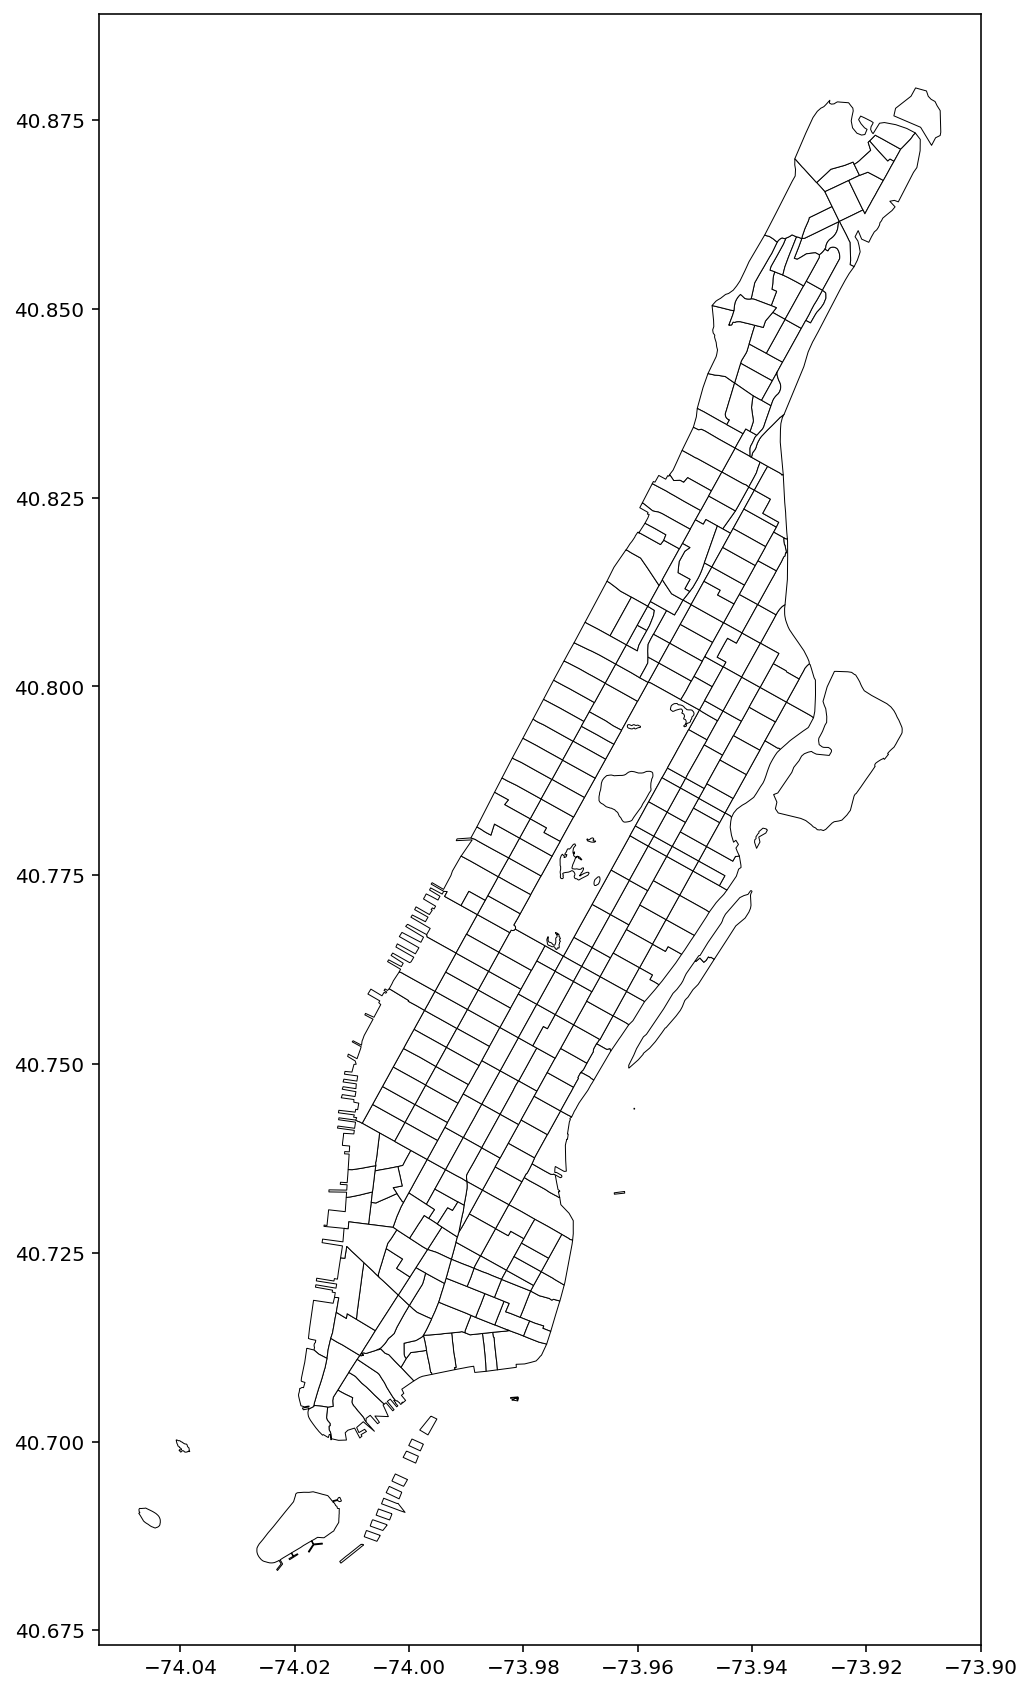

In [ ]:
# Plot the tract boundaries
geo_df.plot(
    figsize=(15, 15),
    color="white",
    edgecolor="black",
    linewidth=0.5,
    zorder=0,
    facecolor="white",
)

In [ ]:
geo_df

STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0        36      061  000700  36061000700       7       Census Tract 7  G5020   
1        36      061  021500  36061021500     215     Census Tract 215  G5020   
2        36      061  025900  36061025900     259     Census Tract 259  G5020   
3        36      061  023801  36061023801  238.01  Census Tract 238.01  G5020   
4        36      061  031703  36061031703  317.03  Census Tract 317.03  G5020   
..      ...      ...     ...          ...     ...                  ...    ...   
283      36      061  015002  36061015002  150.02  Census Tract 150.02  G5020   
284      36      061  015200  36061015200     152     Census Tract 152  G5020   
285      36      061  019100  36061019100     191     Census Tract 191  G5020   
286      36      061  031900  36061031900     319     Census Tract 319  G5020   
287      36      061  019900  36061019900     199     Census Tract 199  G5020   

    FUNCSTAT   ALAND  AWATER     INTPTLAT      INTPTLON  \
0          S  253655  245812  +40.7011730  -074.0020025   
1          S   69708       0  +40.8135272  -073.9494713   
2          S   75469       0  +40.8232145  -073.9423562   
3          S  352467  518667  +40.7551476  -073.9530043   
4          S  248049  467876  +40.7161440  -074.0202950   
..       ...     ...     ...          ...           ...   
283        S  125571       0  +40.7824499  -073.9576478   
284        S  189340  529192  +40.7776648  -073.9398735   
285        S  223477  175654  +40.8015611  -073.9722959   
286        S   99774  317234  +40.7022835  -074.0203960   
287        S  226590  192056  +40.8065430  -073.9687765   

                                              geometry  
0    MULTIPOLYGON (((-73.99750 40.69965, -73.99803 ...  
1    POLYGON ((-73.95151 40.81201, -73.95093 40.812...  
2    POLYGON ((-73.94460 40.82146, -73.94405 40.822...  
3    POLYGON ((-73.96159 40.74982, -73.96071 40.751...  
4    POLYGON ((-74.01305 40.71909, -74.01255 40.719...  
..                                                 ...  
283  POLYGON ((-73.95992 40.78221, -73.95947 40.782...  
284  MULTIPOLYGON (((-73.93951 40.77922, -73.93957 ...  
285  POLYGON ((-73.97290 40.80338, -73.97266 40.803...  
286  POLYGON ((-74.01755 40.70428, -74.01677 40.704...  
287  POLYGON ((-73.96922 40.80851, -73.96887 40.808...  

[288 rows x 13 columns]

In [ ]:
geo_df.explore("NAME", cmap='tab20', legend=False, style_kwds=dict(color="black", linewidth=1))

## Access Census Details for All Tracts in County

In [ ]:
some_useful_census_variables = {
        "B07001_001E": "Total_Population",
        "B07013_002E": "Owner",
        "B07013_003E": "Renter",
        "B07001_017E": "Same_house_1_year_ago",
        "B07013_005E": "Same_house_1_year_ago_owner",
        "B07013_006E": "Same_house_1_year_ago_renter",
        "B19127_001E": "Aggregate_Income",             
        "B19126_001E": "Median_Family_Income", 
        "B25064_001E": "Median_Gross_Rent",
        "B25103_001E": "Median_Real_Estate_Taxes",
        "B19083_001E": "Gini_Index",
      
        "B19080_001E": "Household_Income_Lowest_Quintile_Upper_Limit",
        "B19080_002E": "Household_Income_Second_Quintile_Upper_Limit",
        "B19080_003E": "Household_Income_Third_Quintile_Upper_Limit",
        "B19080_004E": "Household_Income_Fourth_Quintile_Upper_Limit",
        "B19080_005E": "Household_Income_Top_5_Percent_Lower_Limit",
        
        "B13016_002E": "Women_Gave_Birth_Last_Year",
        "B13016_010E": "Women_No_Birth_Last_Year",

        "B25038_015E": "Renter_Moved_in_1979_or_earlier",
        "B25038_014E": "Renter_Moved_in_1980_to_1989",
        "B25038_013E": "Renter_Moved_in_1990_to_1999",
        "B25038_012E": "Renter_Moved_in_2000_to_2009",
        "B25038_011E": "Renter_Moved_in_2010_to_2014",
        "B25038_010E": "Renter_Moved_in_2015_or_later",
        
        "B25038_008E": "Owner_Moved_in_1979_or_earlier",
        "B25038_007E": "Owner_Moved_in_1980_to_1989",
        "B25038_006E": "Owner_Moved_in_1990_to_1999",
        "B25038_005E": "Owner_Moved_in_2000_to_2009",
        "B25038_004E": "Owner_Moved_in_2010_to_2014",
        "B25038_003E": "Owner_Moved_in_2015_or_later",
        
        "B11016_002E": "Family_households",
        "B11016_003E": "Family_households_2person",
        "B11016_004E": "Family_households_3person",
        "B11016_005E": "Family_households_4person",
        "B11016_006E": "Family_households_5person",
        "B11016_007E": "Family_households_6person",
        "B11016_008E": "Family_households_7_or_more",
        
        "B11016_009E": "NonFamily_households",
        "B11016_010E": "NonFamily_households_1person",
        "B11016_011E": "NonFamily_households_2person",
        "B11016_012E": "NonFamily_households_3person",
        "B11016_013E": "NonFamily_households_4person",
        "B11016_014E": "NonFamily_households_5person",
        "B11016_015E": "NonFamily_households_6person",
        "B11016_016E": "NonFamily_households_7_or_more",
     
        "B01001_001E": "Total_Population_All_Races",
        "B01001A_001E": "Total_Population_White",
        "B01001B_001E": "Total_Population_Black",     
        "B01001C_001E": "Total_Population_Native",
        "B01001D_001E": "Total_Population_Asian",     
        "B01001E_001E": "Total_Population_PacificIslander",
        "B01001F_001E": "Total_Population_Other",     
        "B01001G_001E": "Total_Population_Multiple",
        "B01001H_001E": "Total_Population_White_NonHispanic",
        "B01001I_001E": "Total_Population_Hispanic"
 }


In [ ]:
def retrieve_census_data(census_attr, friendly_name):

  # We specify what locations we want the data for
  # We will retrieve information for all the tracts in 
  # the state (STATEFP) and county (COUNTYFP) that we
  # specified earlier
  census_location_query = [("state", STATEFP), ("county", COUNTYFP), ("tract", "*")]
  census_attribute_query = [census_attr]

  # Download data for the variable of interest from census
  df = censusdata.download(
      "acs5", # we use the ACS survey, 5-year data
      YEAR, # we use the data from the 2019 survey
      censusdata.censusgeo(census_location_query),
      census_attribute_query,
  )
  df = df.rename({census_attr: friendly_name}, axis="columns")

  # To visualize the variable, we will assign a percentile score to
  # each tract (otherwise outlier values make it hard to differentiate) 
  df[friendly_name + "_percentile"] = df[friendly_name].rank(pct=True)

  # Replace the index of the dataframe with state, county, and tract values
  df = df.reset_index().rename({"index": "tract_info"}, axis="columns")
  df["state"] = [v.geo[0][1] for v in df.tract_info.values]
  df["county"] = [v.geo[1][1] for v in df.tract_info.values]
  df["tract"] = [v.geo[2][1] for v in df.tract_info.values]
  df = df.drop("tract_info", axis="columns")

  # replace missing value indicator with NaN
  df = df.replace(to_replace=-666666666, value=pd.NA) 
  df[friendly_name] = pd.to_numeric(df[friendly_name], errors='coerce')

  return df

## Visualizing Census Variables on a Map

### Population in Tract

In [ ]:
  # We specify the attribute(s) that we want to retrieve
  census_attr = "B07001_001E"
  friendly_name = "Total_Population"

  df = retrieve_census_data(census_attr, friendly_name)


In [ ]:
aux_df = pd.merge(
    geo_df,
    df,
    left_on=["STATEFP", "COUNTYFP", "TRACTCE"],
    right_on=["state", "county", "tract"],
)

In [ ]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'light',
        'size'   : 18}

matplotlib.rc('font', **font)

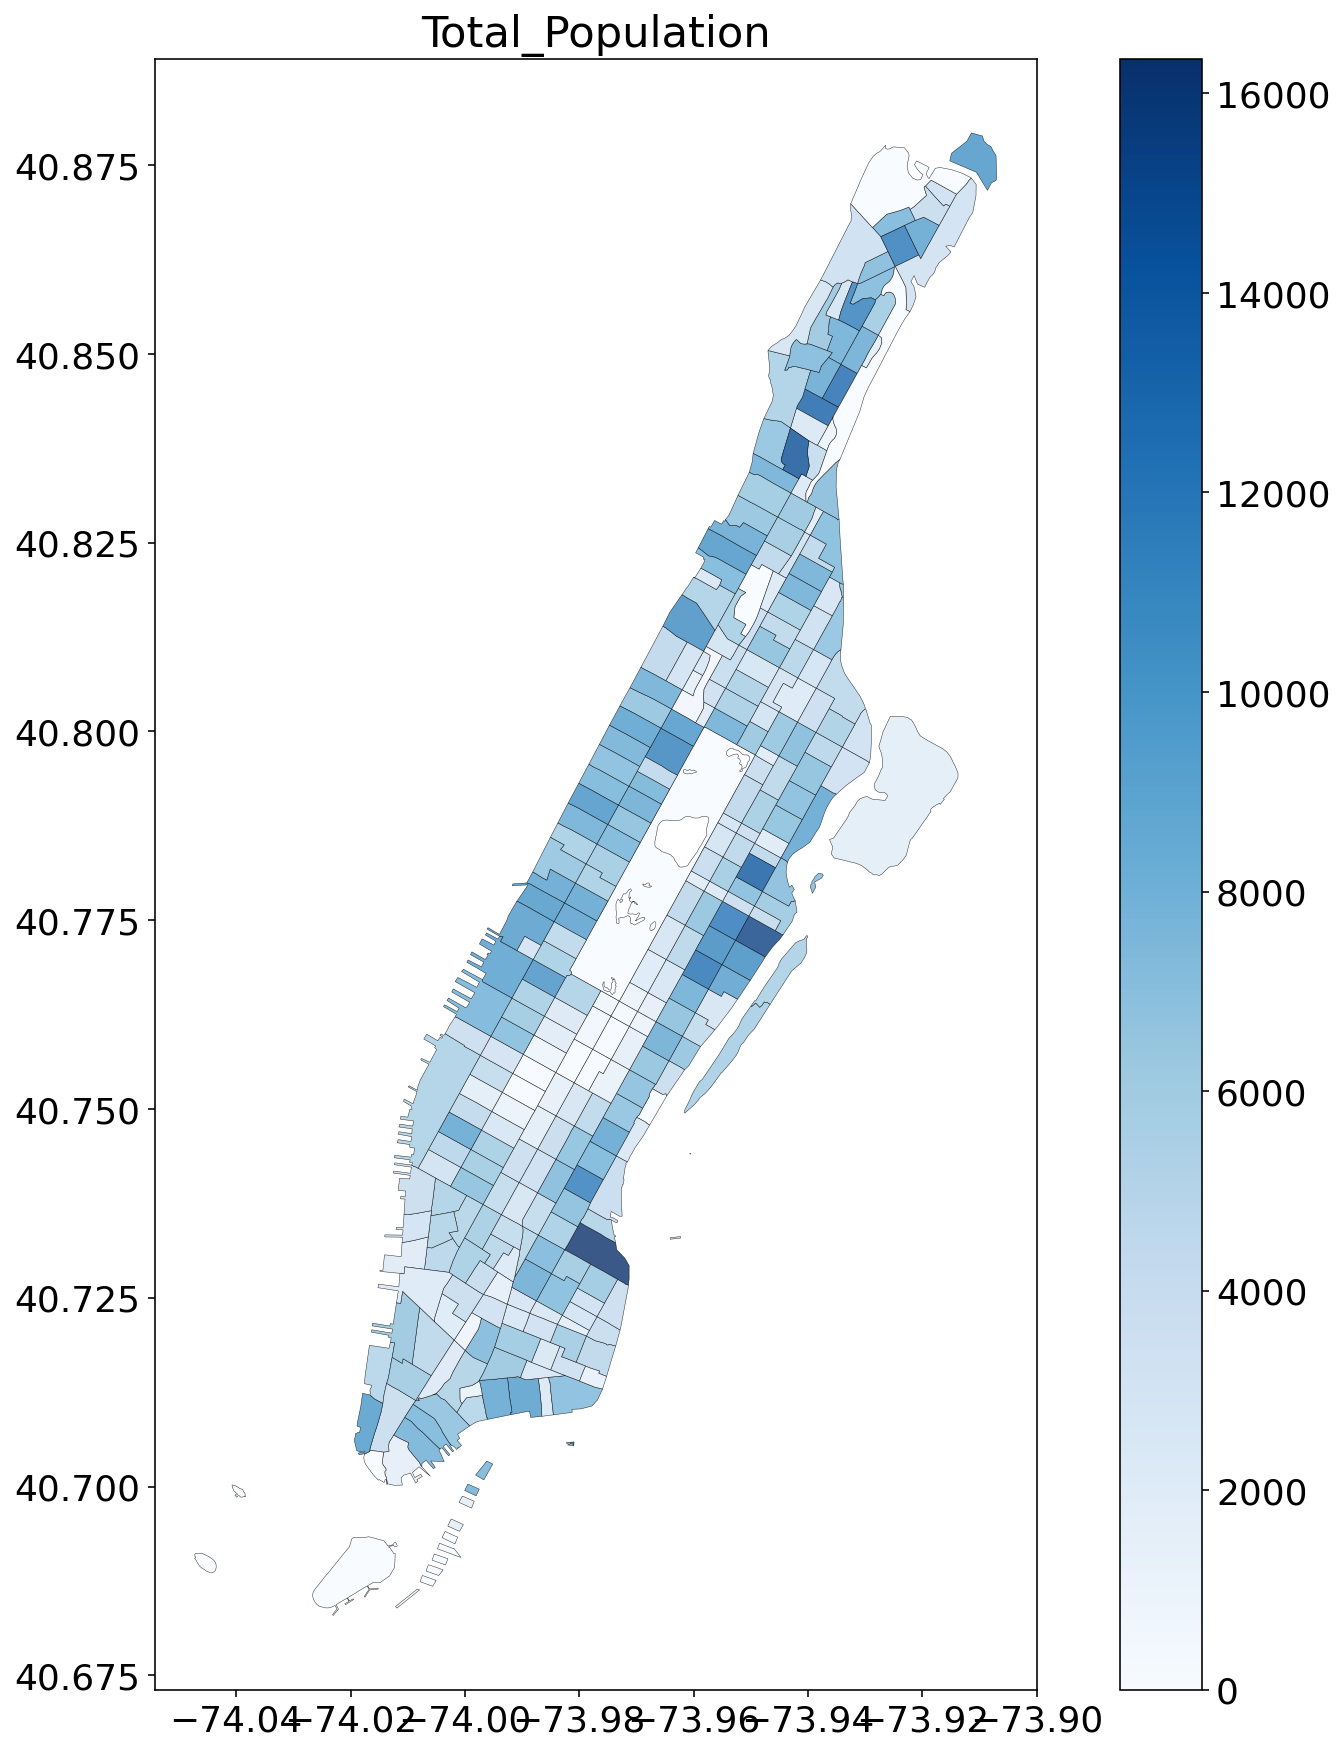

In [ ]:
# Plotting the raw population values
# Notice that due to a few outlier values, most
# of the map looks blue
ax = aux_df.dropna().plot(
    column=friendly_name,
    categorical = False,
    linewidth=0.25,
    edgecolor="Black",
    figsize=(15, 15),
    cmap="Blues", 
    # scheme = "Quantiles", k =9,
    alpha=0.8, legend=True,
    legend_kwds = dict(fmt="${:,.0f}")
)
ax.set_title(friendly_name)
pass # do not print the title in the output

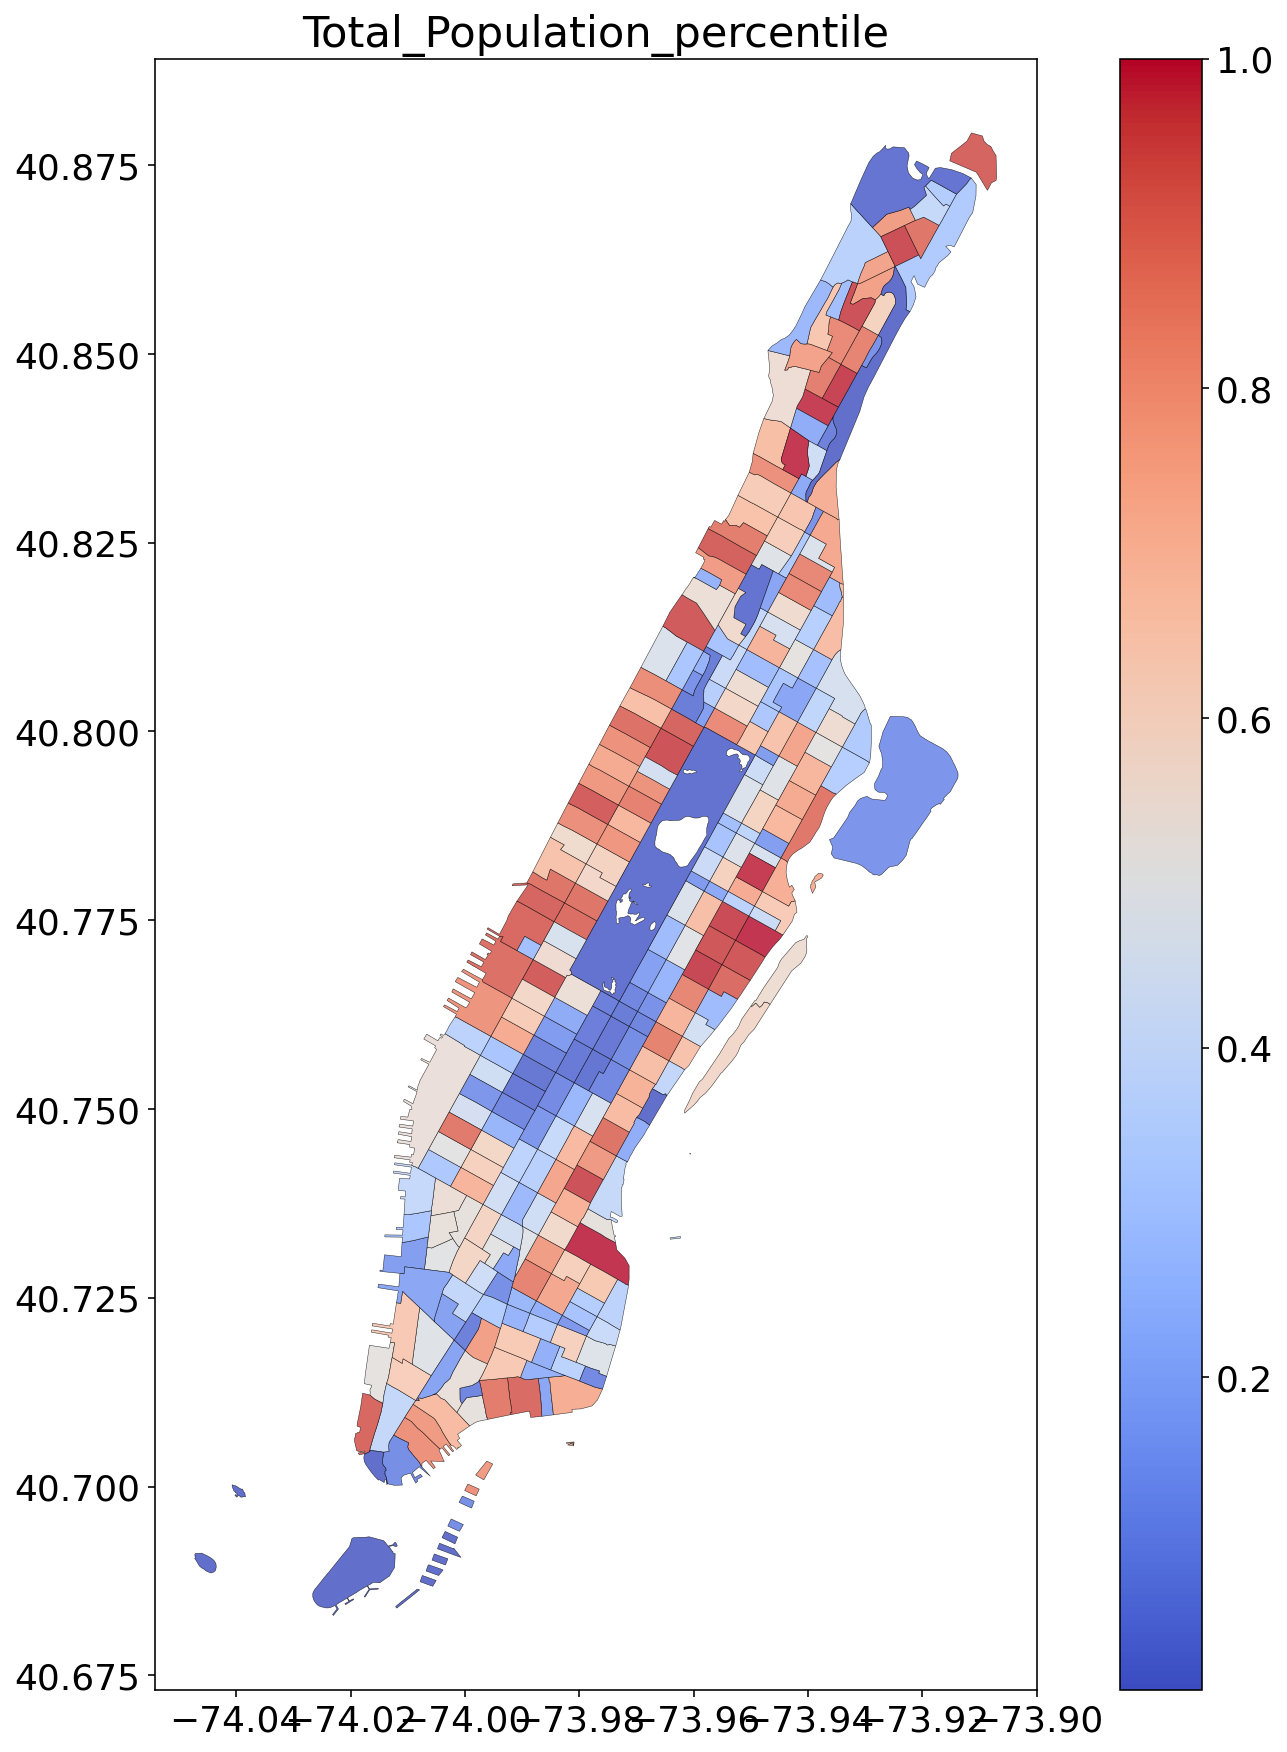

In [ ]:
# By using the percentile values instead (which are normalized and uniform)
# the colors associated with each tract are now more informative (at the
# expense of not highlighting the outliers)
ax = aux_df.plot(
    column=friendly_name + "_percentile",
    linewidth=0.25,
    edgecolor="Black",
    figsize=(15, 15),
    cmap="coolwarm",
    alpha=0.8, legend=True
)
ax.set_title(friendly_name + "_percentile")
pass # do not print the title in the output

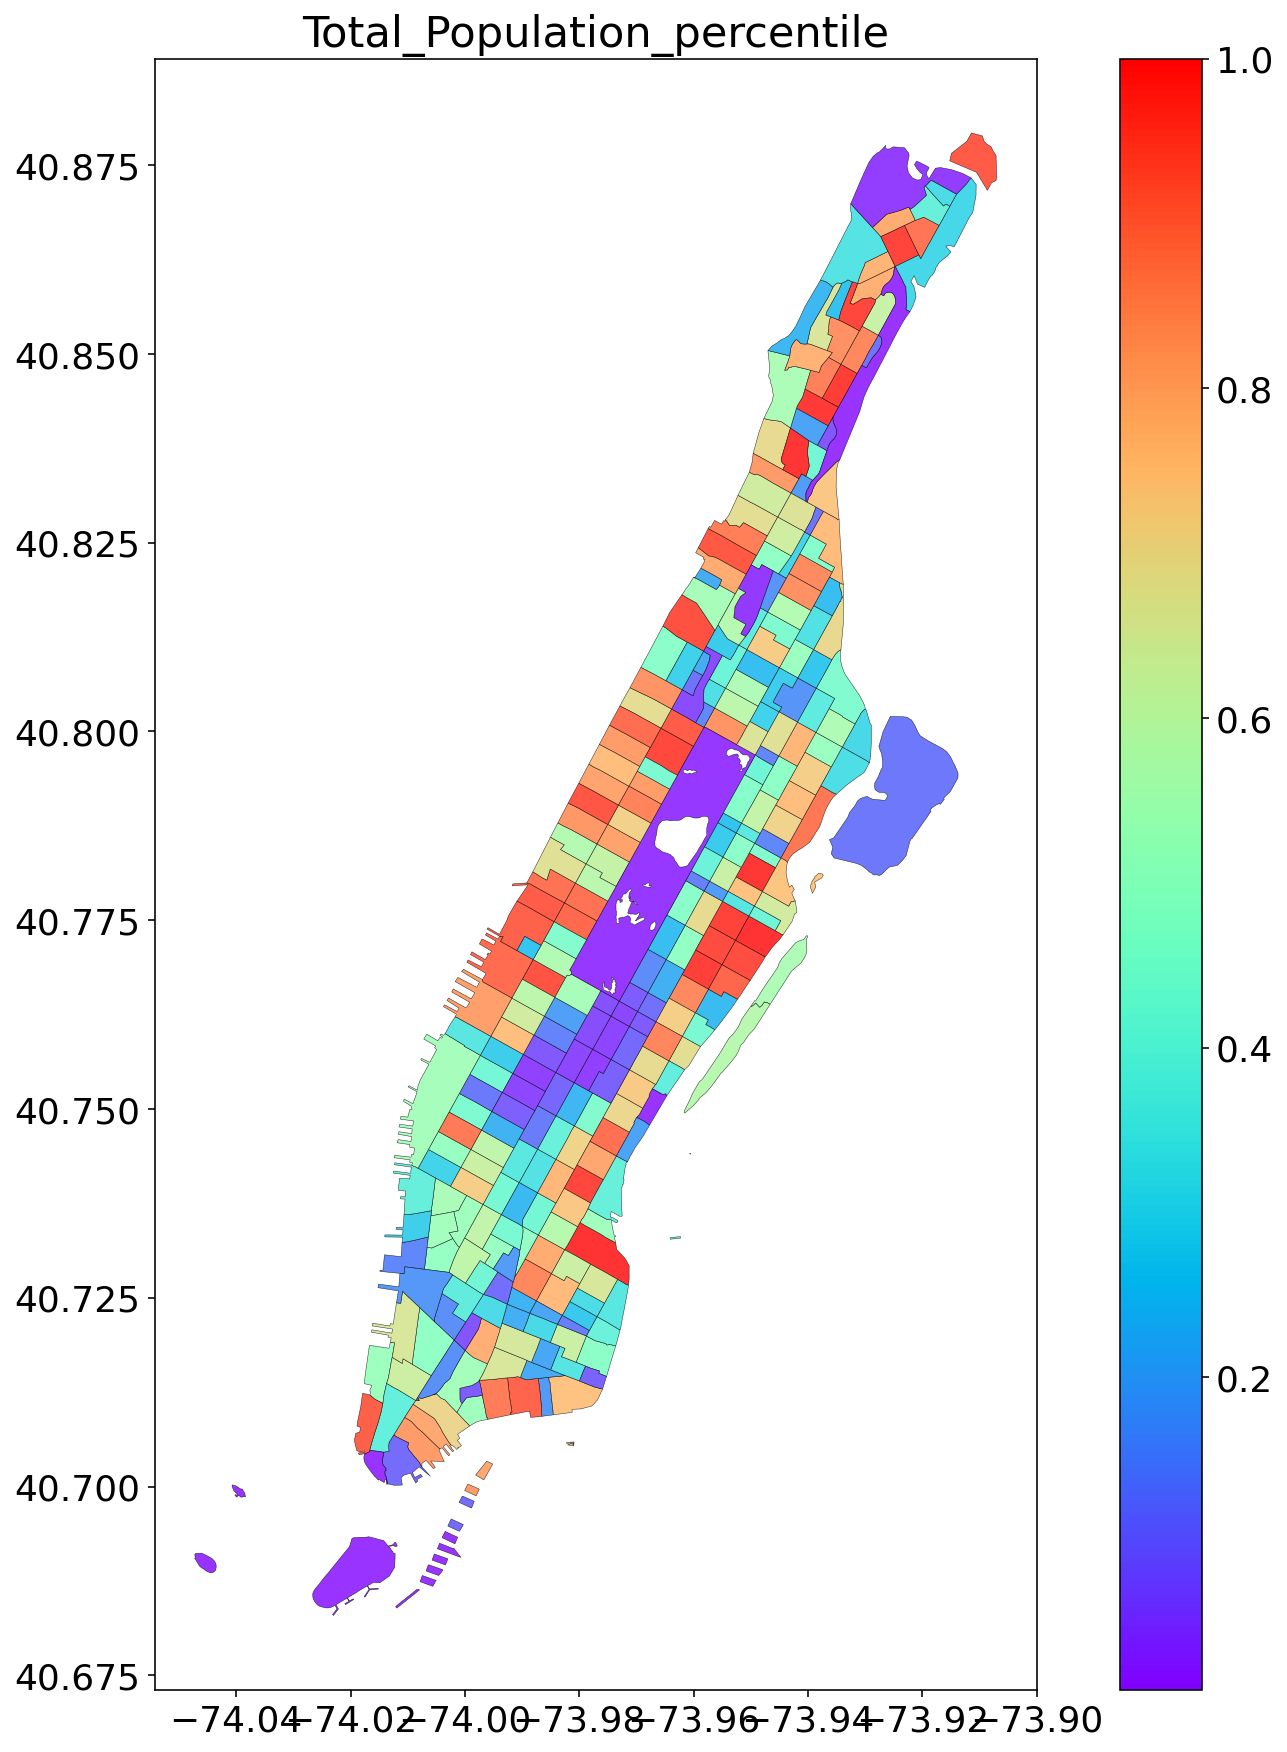

In [ ]:
# By using the percentile values instead (which are normalized and uniform)
# the colors associated with each tract are now more informative (at the
# expense of not highlighting the outliers)
ax = aux_df.plot(
    column=friendly_name + "_percentile",
    linewidth=0.25,
    edgecolor="Black",
    figsize=(15, 15),
    cmap="rainbow",
    alpha=0.8, legend=True
)
ax.set_title(friendly_name + "_percentile")
pass # do not print the title in the output

## Putting multiple maps on a plot, plus Manhattan neighborhoods

In [ ]:
# Dataset from NYC Open Data: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
nyc_geourl = "https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON"
nyc_neighborhoods = gpd.GeoDataFrame.from_file(nyc_geourl)
manhattan = nyc_neighborhoods[nyc_neighborhoods.county_fips == "061"]

In [ ]:
def plot_variable(df, variable_name, percentile, ax):

  if percentile: suffix = "_percentile" 
  else:  suffix = "" 
  
    # Plot the variable of interest
  ax = df.plot(
      column=variable_name + suffix,
      linewidth=0.5,
      edgecolor="Black",
      cmap="coolwarm",
      alpha=0.6,
      ax = ax
  )
  ax.set_title(variable_name + suffix)

  # For aesthetics, we plot the NYC neighborhoods on top
  manhattan.plot(
      color="white",
      edgecolor="black",
      linewidth=2,
      zorder=0,
      facecolor="white",
      ax=ax,
  )
  return ax

In [ ]:
census_attr = "B19126_001E"
friendly_name = "Median_Family_Income"
income_df = retrieve_census_data(census_attr, friendly_name)
income_df = pd.merge(geo_df, income_df, left_on=["STATEFP", "COUNTYFP", "TRACTCE"], right_on=["state", "county", "tract"])

In [ ]:
census_attr = "B19083_001E"
friendly_name = "Gini_Index"
gini_df = retrieve_census_data(census_attr, friendly_name)
gini_df = pd.merge(geo_df, gini_df, left_on=["STATEFP", "COUNTYFP", "TRACTCE"], right_on=["state", "county", "tract"])

In [ ]:
census_attr = "B07001_001E"
friendly_name = "Total_Population"
population_df = retrieve_census_data(census_attr, friendly_name)
population_df = pd.merge(geo_df, population_df, left_on=["STATEFP", "COUNTYFP", "TRACTCE"], right_on=["state", "county", "tract"])

# Using the land area of each tract, we can calculate the population density
# to account for the different sizes of the tracts
population_df['Population_Density'] = population_df['Total_Population']/population_df['ALAND']
population_df['Population_Density_percentile'] = population_df['Population_Density'].rank(pct=True)

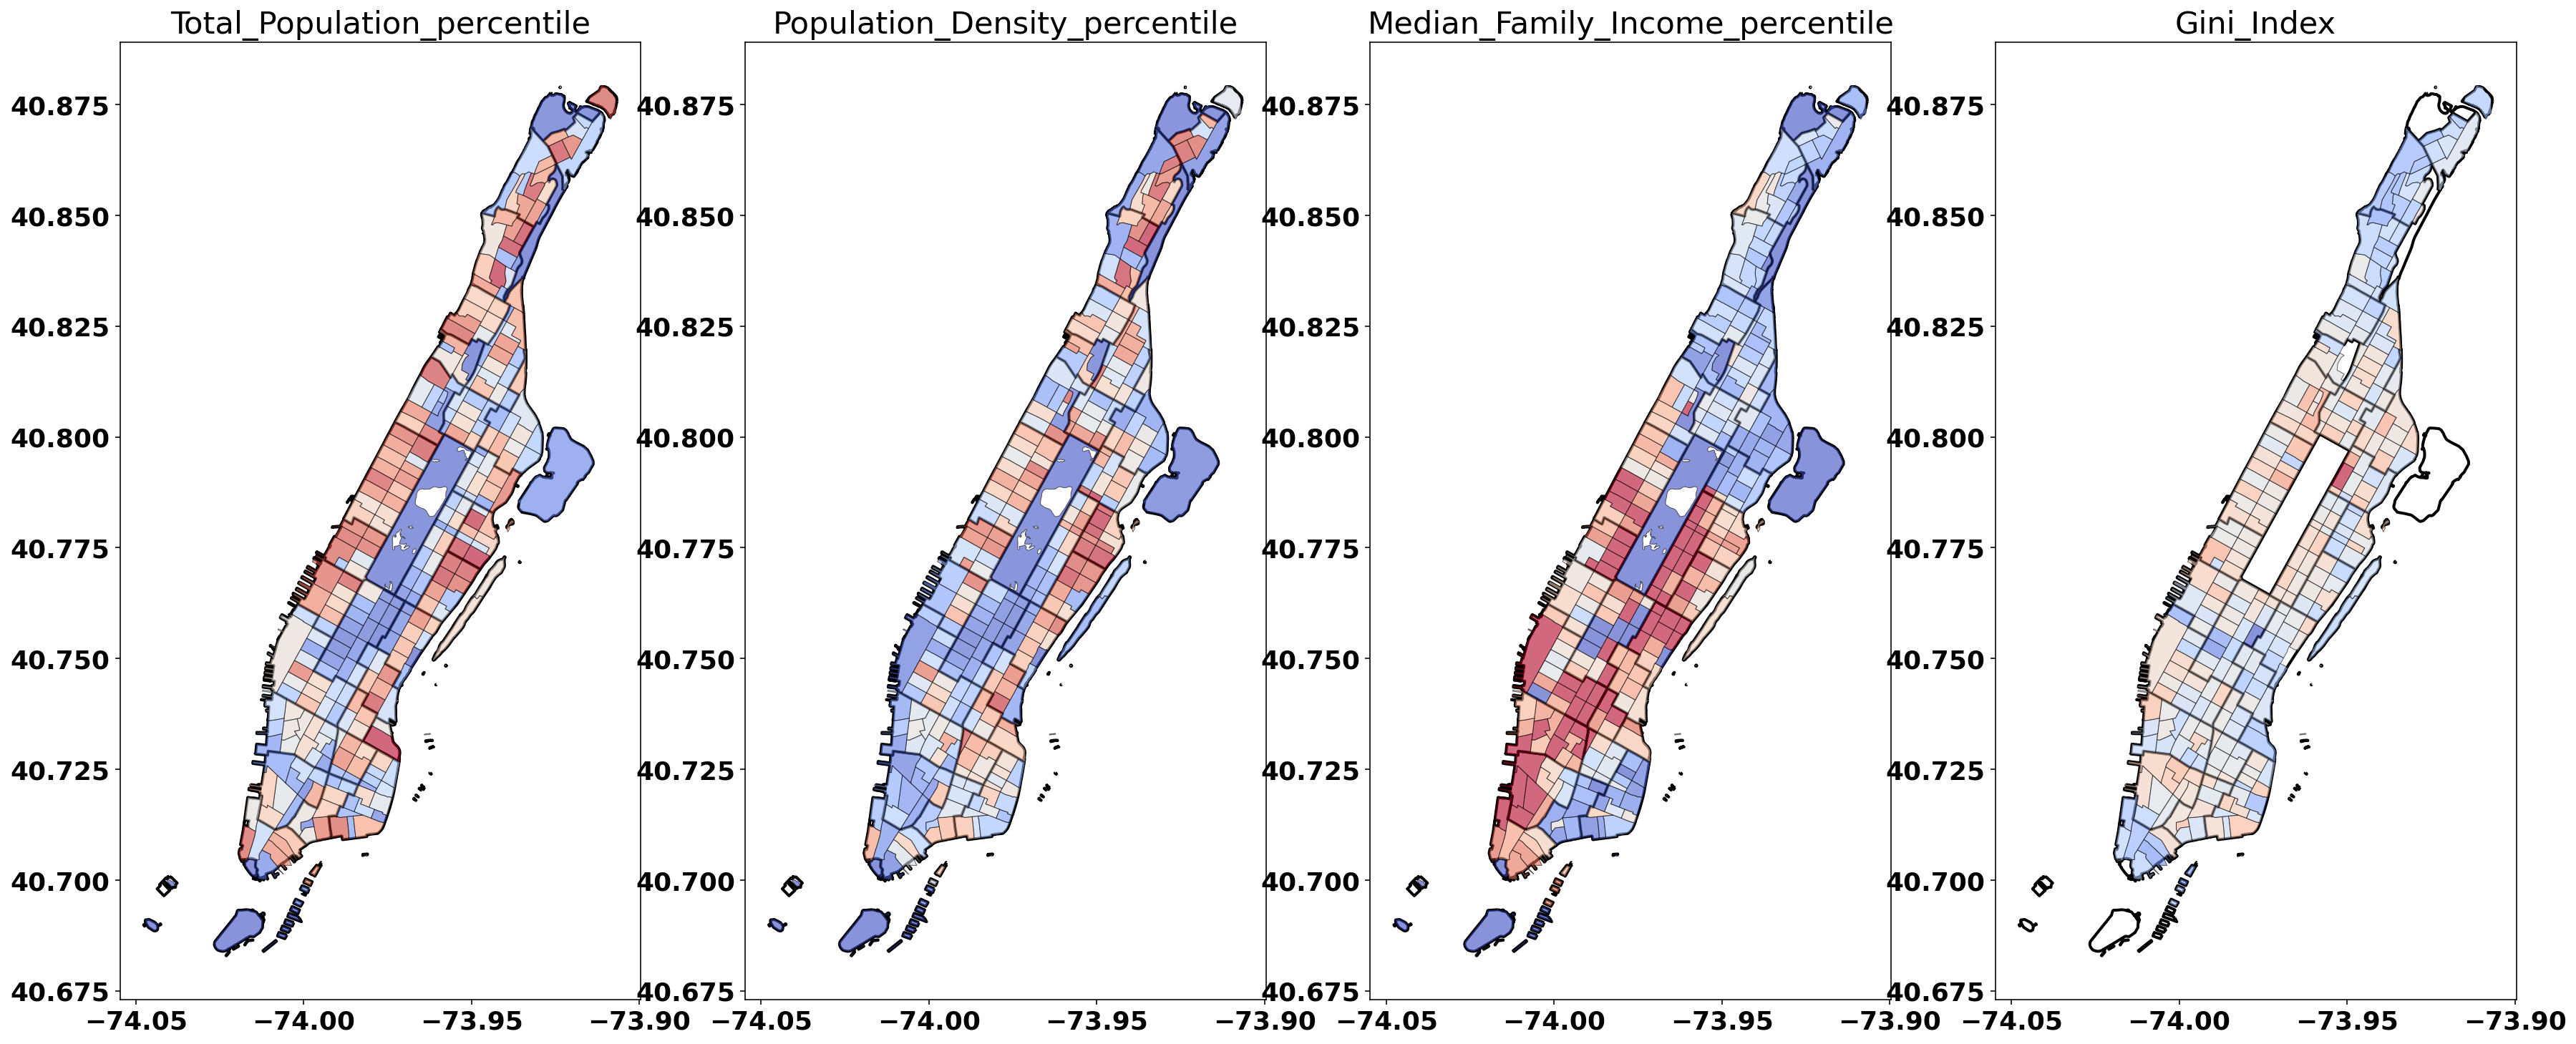

In [ ]:

# Create a figure, with a 1x4 grid. 
# The "ax" is a 1-dimensional array with 4 elements
fig, ax = plt.subplots(nrows=1, ncols=4, figsize =(30,15))

# We now create one plot for each of the 4 "axes" and put the plot in the 
# corresponding ax
plot_variable(population_df, "Total_Population", percentile=True, ax = ax[0])
plot_variable(population_df, "Population_Density", percentile=True, ax = ax[1])
plot_variable(income_df, "Median_Family_Income", percentile=True, ax = ax[2])
plot_variable(gini_df, "Gini_Index", percentile=False, ax = ax[3])



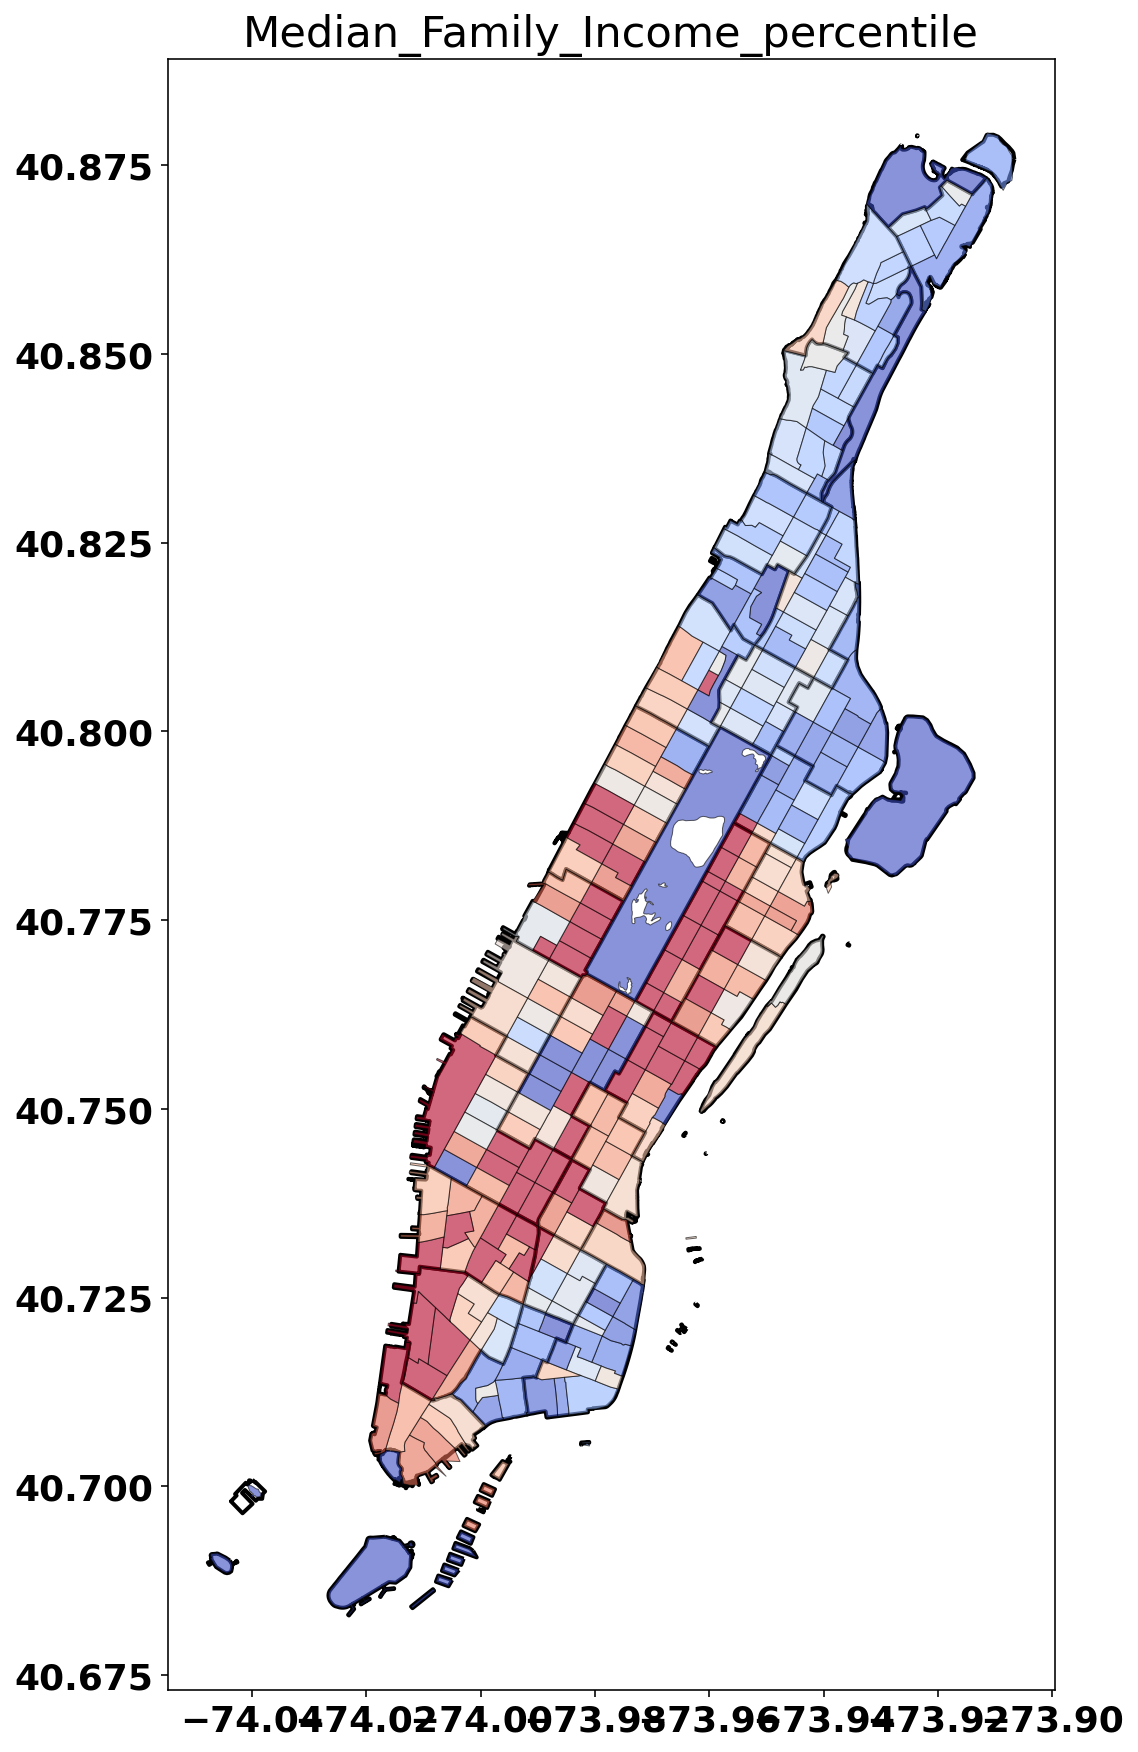

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize =(30,15))
plot_variable(income_df, "Median_Family_Income", percentile=True, ax = ax)

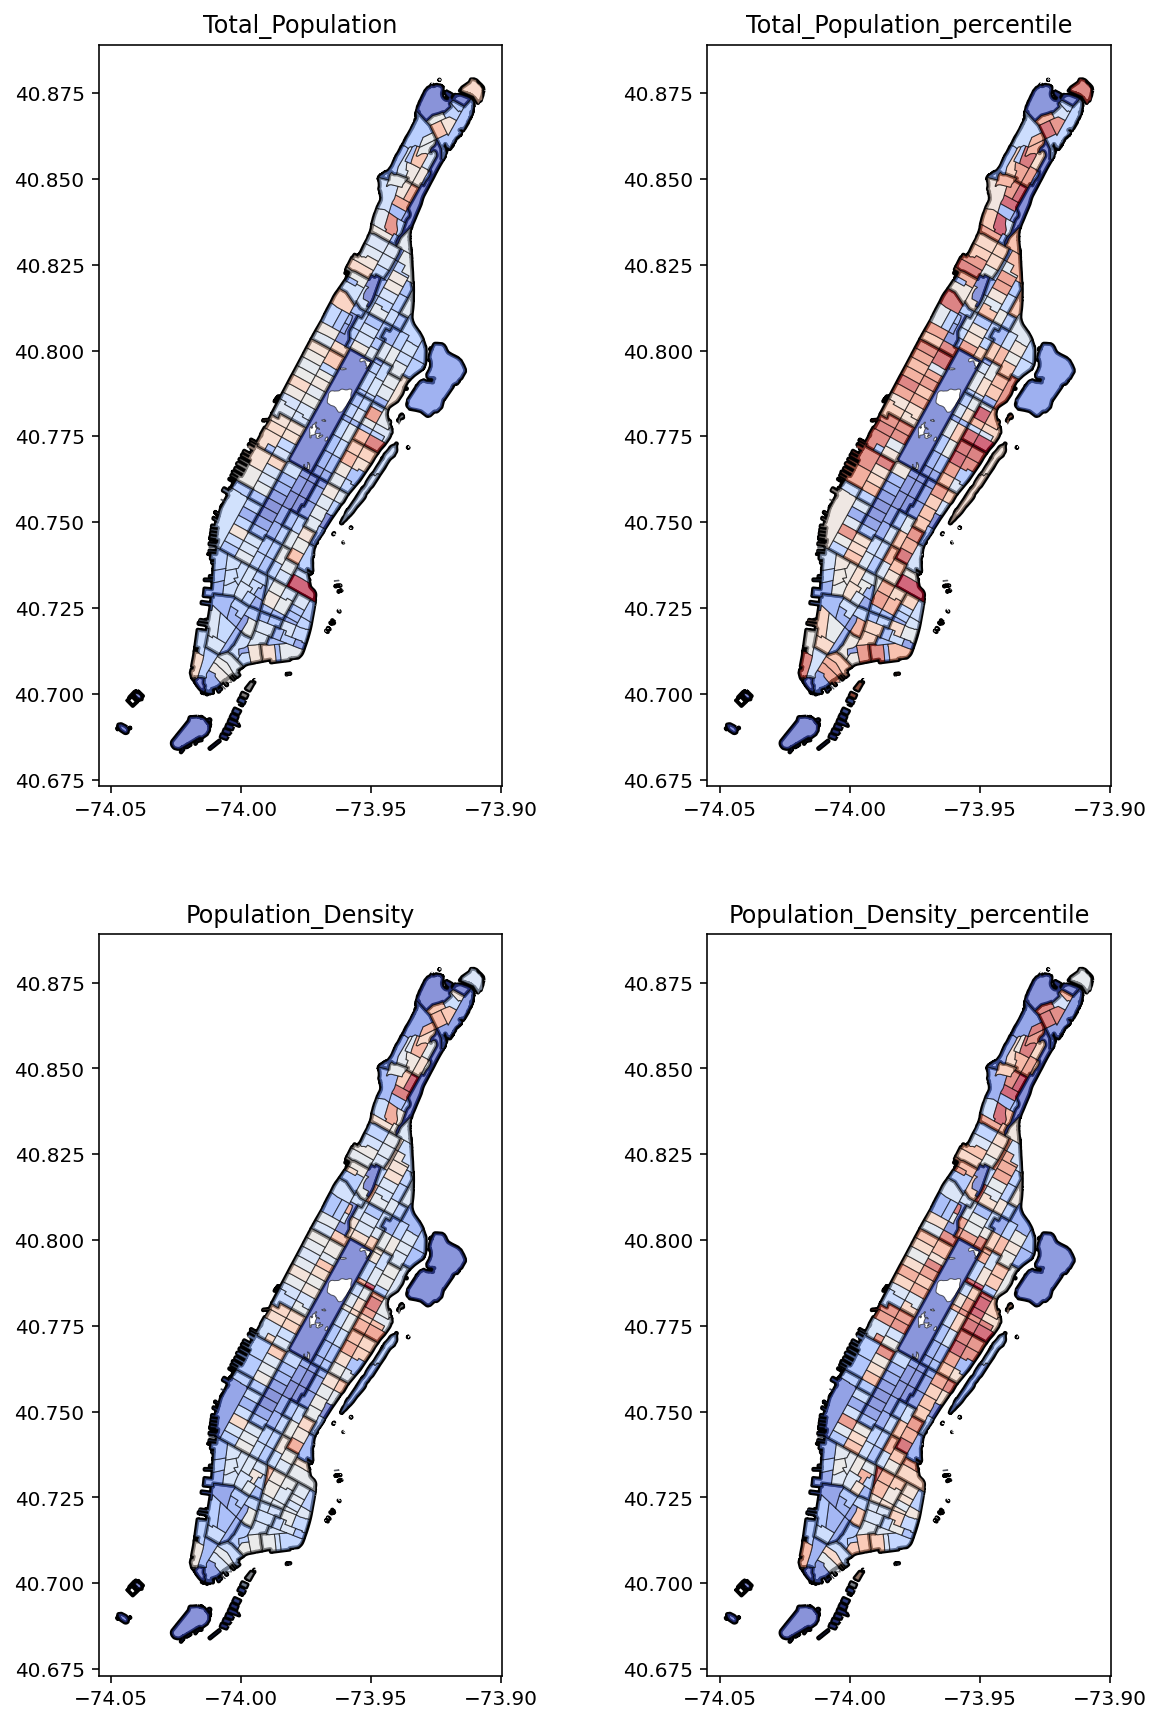

In [ ]:

# Repeat, but with two rows and two columns
# Create a figure, with a 2x2 grid. The "ax" is a 2-dimensional array
fig, ax = plt.subplots(nrows=2, ncols=2, figsize =(10,15))

# We now create one plot for each of the 4 "axes" and put the plot in the 
# corresponding ax
plot_variable(population_df, "Total_Population", percentile=False, ax = ax[0][0])
plot_variable(population_df, "Total_Population", percentile=True, ax = ax[0][1])
plot_variable(population_df, "Population_Density", percentile=False, ax = ax[1][0])
plot_variable(population_df, "Population_Density", percentile=True, ax = ax[1][1])

## Plot the maps using Folium

Good tutorial at https://www.roelpeters.be/plot-choropleth-map-geopandas-folium/ and https://nbviewer.org/github/python-visualization/folium/blob/master/examples/GeoJSON_and_choropleth.ipynb#Using-choropleth-method

Consider adjusting the `StepColormap` if you want to use more bins than the default 12 ones provided by Folium.

In [ ]:
# First we prepare our datasets to be easily joined
income_df['FIPS_code'] = income_df['STATEFP'] + income_df['COUNTYFP'] + income_df['TRACTCE']
geo_df['FIPS_code'] = geo_df['STATEFP'] + geo_df['COUNTYFP'] + geo_df['TRACTCE']

# Need to convert our geopandas into a format that the Choropleth function
# of Folium can understand directly. We convert to GeoJSON
geometries = geo_df[['FIPS_code', 'geometry']].set_index('FIPS_code').to_json()

# We only keep the columns that we need from the data 
income = income_df[['FIPS_code', 'Median_Family_Income', 'Median_Family_Income_percentile']]

In [ ]:
import folium
fmap = folium.Map(location=[40.775, -73.95], zoom_start=12, tiles='cartodbpositron')


# We want more color bins than the default, so we create them here
quantiles = np.linspace(0,1,num=12)
bins = list(income["Median_Family_Income"].quantile(quantiles))

folium.Choropleth(geo_data=geometries, 
                data=income,
                name="Median_Family_Income",
                columns=['FIPS_code', 'Median_Family_Income'],
                key_on='feature.id',
                fill_color='RdBu_r', # Red-Blue divergent colormap, reverse order (_r) to put the red for high
                fill_opacity=0.5, 
                line_opacity=0.1,
                legend_name='Median_Family_Income',
                nan_fill_color = 'gray',
                nan_fill_opacity = 0.25,
                highlight=True,
                bins=bins 
).add_to(fmap)

folium.LayerControl().add_to(fmap)
fmap